# Lista de Exercício 06
### Introdução à Visão Computacional (SEL0339/SEL5886)

**Instruções:**

 1. Esta lista consiste de 2 exercícios.
 1. Deve-se colocar comentários nos códigos desenvolvidos.
 1. As perguntas devem ser respondidas também como comentários no arquivo.
 1. Colocar seu nome e número USP abaixo.
 1. Quaisquer problemas na execução das listas, entrar em contato com os monitores.
 1. Depois de terminado os exercícios, deve ser gerado um arquivo **extensão .ipynb** para ser enviado ao professor pelo E-DISCIPLINAS da disciplina até a data máxima de entrega.
 1. Caso não seja enviado, o aluno ficará sem nota.


---



 <table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/LAVI-USP/SEL0339-SEL5886_2023/blob/main/praticas/Lista_de_Exercicio_6.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Executar no Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/LAVI-USP/SEL0339-SEL5886_2023/blob/main/praticas/Lista_de_Exercicio_6.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />Ver codigo fonte no GitHub</a>
  </td>
</table>


`Nome: Bruno Paiva Sant'Anna`

`Número USP: 11819507`

### Introdução:


Vamos importar as bibliotecas que iremos utilizar:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

#bibliotecas para Cluster Analysis
from scipy.cluster import hierarchy
from scipy.spatial.distance import pdist
from sklearn.cluster import KMeans

#### **Atenção**: os códigos abaixo são para fazer o download das imagens (EXECUTE-OS). Os mesmos não fazem parte dessa prática.

In [2]:
import urllib.request

try:
  urllib.request.urlretrieve("https://github.com/LAVI-USP/SEL0339-SEL5886_2023/raw/main/imagens/pratica_06/flores.csv", "flores.csv")
except:
  print("[ERRO] Não foi possível fazer o download das imagens dessa prática. Entre em contato com o monitor")


### 1) Análise de Agrupamentos (*Cluster Analysis*)

Uma forma de agrupar dados que não possuem classes preestabelecidas é utilizando um método não-supervisionado, como o algoritmo de análise hierárquica e seu dendrograma equivalente. Outro método é o K-Means, que por meio de um método iterativo encontra K grupos de acordo com uma métrica de similaridade, como a distância euclidiana.

Abaixo temos um conjunto de dados sobre algumas flores. Neste exercício realizaremos o agrupamento dessas flores utilizando atributos apresentados (Comprimento da sépala, Largura da sépala, Comprimento da pétala).

<center><figcaption><b> Tabela 1: </b> Relação de algumas flores</b></figcaption>
</figure>

>Flor | Comprimento da sépala (mm) | Largura da sépala (mm) | Comprimento da pétala (mm)
>--- | --- | --- | ---
><center>Flor 1 | <center>41 | <center>40 | <center>14
><center>Flor 2 | <center>57 | <center>3 | <center>32
><center>Flor 3 | <center>51 | <center>5 | <center>36
><center>Flor 4 | <center>68 | <center>28 | <center>54
><center>Flor 5 | <center>46 | <center>38 | <center>14
><center>Flor 6 | <center>44 | <center>39 | <center>17
><center>Flor 7  | <center>64 | <center>24 | <center>52
><center>Flor 8  | <center>61 | <center>3 | <center>36
><center>Flor 9  | <center>55 | <center>4 | <center>34
><center>Flor 10  | <center>46 | <center>41 | <center>15
><center>Flor 11  | <center>56 | <center>3 | <center>31
><center>Flor 12  | <center>69 | <center>26 | <center>51
><center>Flor 13  | <center>66 | <center>25 | <center>55
><center>Flor 14  | <center>45 | <center>37 | <center>14
><center>Flor 15  | <center>69 | <center>26 | <center>51
</center>

**Exercício:**

**1**. Carregar a tabela de dados disponível no arquivo **flores.csv**. Os dados seguem a mesma ordem apresentada na **Tabela 1**.

**2**. Fazer a padronização dos dados pela amostra de acordo com a fórmula abaixo:

\begin{equation}
  Z = \frac{X - \bar{X}}{\sigma_{X}}
\end{equation}

onde $X$ representa o atributo analisado, $\bar{X}$ o seu valor médio e $\sigma_{X}$ o sue desvio padrão.

**3**. Encontrar a Matriz de Distância dos dados padronizados em (**2**) utilizando a função [**pdist**](https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.pdist.html#scipy.spatial.distance.pdist), que retorna a Matriz de Distância condensada (apenas os valores acima da diagonal principal), ideal para a utilização com as demais funções da biblioteca **scipy** para tal finalidade.

* `D = pdist(M) %‘M’ é a matriz padronizada`

**4**. Definir as Ligações para agrupar os objetos/Vetores utilizando a Ligação Centróide. [**hierarchy.linkage**](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.linkage.html#scipy.cluster.hierarchy.linkage)

* `Z = hierarchy.linkage(D,'centroid')`

**5**. Plotar o Dendrograma de Z e expliquar o significado de cada ramo. [**hierarchy.dendrogram**](https://docs.scipy.org/doc/scipy/reference/generated/scipy.cluster.hierarchy.dendrogram.html)

* `H = hierarchy.dendrogram(Z,labels=nomes,orientation='right')`

OBS: O eixo de similaridade para o caso da função do SciPy é apresentado com valores de nível de distância em lugar de similaridade.

**6**. Qual o limiar que se deve estabelecer para separar as flores em 3 grupos?

**7**. Aplicar o método K-means (para k=3) para tentar agrupar os vetores de atributos. Imprimir os valores dos centróides e os agrupamentos após o método convergir.

* É possível utilizar as funções (métodos) da classe [**KMeans**](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html) da biblioteca **sklearn**:

  `kmeans = KMeans(n_clusters=numero_de_clusters, random_state=0).fit(dados_padronizados)`
  
  `classe_de_cada_amostra = kmeans.labels_`

  `centroides = kmeans.cluster_centers_`

**8**. Utilizando a função [**scatter3D**](https://www.geeksforgeeks.org/3d-scatter-plotting-in-python-using-matplotlib/) do matplotlib, plote o espaço tridimensional com os atributos (Comprimento da sépala, Largura da sépala, Comprimento da pétala) de cada flor, além de indicar os 3 centroides calculados.

**9**. Com os centroides encontrados em (**3**), verifique em qual Grupo (Cluster) a nova flor (Flor Teste) é classificada, verificando com qual tem maior similaridade (utilize a distância Euclidiana para verificação da classe) e não se esqueça de aplicar a padronização baseada no conjunto de treino.

<center>

>Flor | Comprimento da sépala (mm) | Largura da sépala (mm) | Comprimento da pétala (mm)
>--- | --- | --- | ---
><center>Flor Teste | <center>56 | <center>11 | <center>31
</center>

* É possível utilziar um método do **KMeans** para realizar a classificação do novo vetor de característica:

  `nova_predição = kmeans.predict(vetor_flor_teste)`


<font size="3" color="darkblue"><b>Dicas:</b></font>


*  Você pode utilizar a função [np.genfromtxt](https://numpy.org/doc/stable/reference/generated/numpy.genfromtxt.html#numpy.genfromtxt) para carregar o arquivo .csv. Em geral, para esse tipo de arquivo é utilizada a biblioteca Pandas.

*Ex:*
``` python
    dados_flores = np.genfromtxt('flores.csv',dtype=int,delimiter=';')
```

* Você pode utilizar a função [np.linalg.norm](https://numpy.org/doc/stable/reference/generated/numpy.linalg.norm.html) da biblioteca `numpy.linalg` para calcular a distância entre os vetores.

*Ex:*
``` python
    distancia = np.linalg.norm(diferenca_entre_vetores)
```

* O dendrograma pela função da biblioteca scipy é plotado em níveis de distância, em lugar de indicar a similaridade como apresentado em aula. Entretanto, a análise é análoga. O seu tamanho pode ser definido como uma plt.figure:

*Ex:*
``` python
    plt.figure(figsize=(largura,altura))
    dn = hierarchy.dendrogram(Z,labels=labels,orientation='right')
    plt.show()
```   
* Para o gráfico 3D, pode-se plotá-lo utilizando funções do matplotlib, como pelo seguinte exemplo:

``` python
    fig = plt.figure(figsize = (largura, altura))
    ax = plt.axes(projection ="3d")
    # Criando o  plot
    # As coordenadas x, y e z podem ser vetores com várias coordenadas em uma quantidade igual de valores. O parâmetro c ou color, pode ser um vetor de cores ou apenas uma cor.
    ax.scatter3D(x, y, z, c=vetor_de_cores,s=tamanho_do_ponto)
    # O ax.text permite adicionar uma etiqueta ao ponto que se deseja. Se preferir etiquetar todos os pontos é possível chamar a função em um laço for
    ax.text(x, y, z,  'etiqueta', size=10, zorder=1, color='k')
    ax.set_xlabel('Atributo 1')
    ax.set_ylabel('Atributo 2')
    ax.set_zlabel('Atributo 3')
    plt.title("Títlo do Gráfico")
    plt.show()
```  


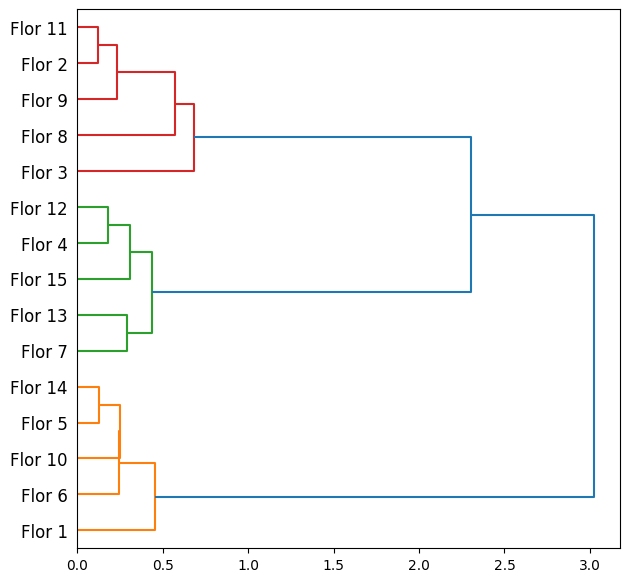

/home/brunopaivasantanna/Documents/Graduação/8_Semestre/Visão/Listas/Lista_6/.venv/lib64/python3.11/site-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


A classe 0 tem centroide [ 0.01386217 -1.31797047 -0.0167345 ]
A classe 1 tem centroide [-1.19214699  1.08698595 -1.20906744]
A classe 2 tem centroide [1.17828482 0.23098451 1.22580194]
A flor 1 pertence à classe 1
A flor 2 pertence à classe 0
A flor 3 pertence à classe 0
A flor 4 pertence à classe 2
A flor 5 pertence à classe 1
A flor 6 pertence à classe 1
A flor 7 pertence à classe 2
A flor 8 pertence à classe 0
A flor 9 pertence à classe 0
A flor 10 pertence à classe 1
A flor 11 pertence à classe 0
A flor 12 pertence à classe 2
A flor 13 pertence à classe 2
A flor 14 pertence à classe 1
A flor 15 pertence à classe 2


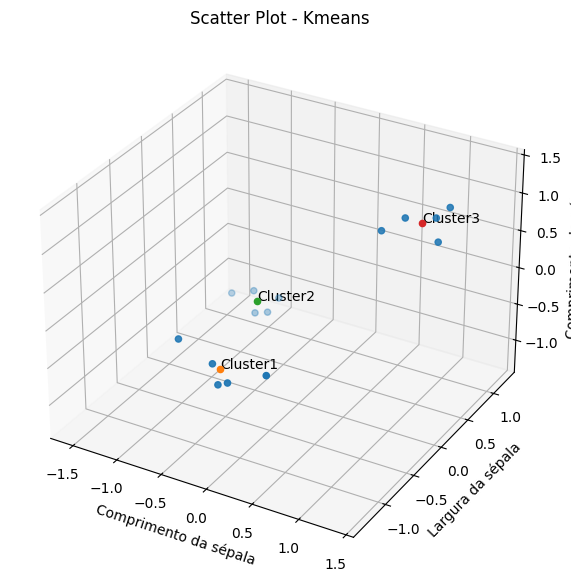

[0 0 0]
A distância entre o vetor teste e o centroide 0 é 1.3181495958842835
A distância entre o vetor teste e o centroide 1 é 2.016084571091828
A distância entre o vetor teste e o centroide 2 é 1.7158960805126893
Pelas distâncias, a flor teste foi classificada na classe 0

Pelo método kmeans a flor de teste foi colocada na classe 0


In [33]:
## -- Seu código começa AQUI -- ##
# 1.
# Carregando o arquivo
flores = np.loadtxt('flores.csv', delimiter=';', dtype=float)

# 2.
comp_sep = flores[:,0]
larg_sep = flores[:,1]
comp_pet = flores[:,2]

# Calculando a mádia de cada grandeza
mean_comp_sep = np.mean(comp_sep)
mean_larg_sep = np.mean(larg_sep)
mean_comp_pet = np.mean(comp_pet)

# Calculando o desvio padrão de cada grandeza
std_comp_sep = np.std(comp_sep)
std_larg_sep = np.std(larg_sep)
std_comp_pet = np.std(comp_pet)

# Normalizando os dados
comp_sep_norm = (comp_sep - mean_comp_sep)/std_comp_sep 
larg_sep_norm = (larg_sep - mean_larg_sep)/std_larg_sep
comp_pet_norm = (comp_pet - mean_comp_pet)/std_comp_pet

flores_norm = np.zeros_like(flores)
flores_norm[:,0] = comp_sep_norm
flores_norm[:,1] = larg_sep_norm
flores_norm[:,2] = comp_pet_norm

# 3.
# Calculando a matriz de distâncias
M_dist = pdist(flores_norm)

# 4.
# Definindo as ligações
Z = hierarchy.linkage(M_dist, 'centroid')
# 5.
# Plotando o dendograma
nomes = ['Flor 1', 'Flor 2', 'Flor 3', 'Flor 4', 'Flor 5', 
         'Flor 6', 'Flor 7', 'Flor 8', 'Flor 9', 'Flor 10', 
         'Flor 11', 'Flor 12', 'Flor 13', 'Flor 14', 'Flor 15']

plt.figure(figsize=(7,7))
H = hierarchy.dendrogram(Z, labels=nomes, orientation='right')
plt.show()

# 7.
# Aplicando o kmeans
kmeans = KMeans(n_clusters=3, random_state=0).fit(flores_norm)

# Retirando as classes e os centróides
centroides = kmeans.cluster_centers_
classes = kmeans.labels_

for i in range(len(centroides)):
    print(f'A classe {i} tem centroide {centroides[i]}')

for i in range(len(classes)):
    print(f'A flor {i+1} pertence à classe {classes[i]}')

# 8.
# Criando o scatter plot 3D
fig = plt.figure(figsize = (7,7))
ax = plt.axes(projection ="3d")
ax.scatter3D(comp_sep_norm, larg_sep_norm, comp_pet_norm)

# Mostrando os centroides
for i in range(len(centroides)):
  ax.scatter3D(centroides[i,0], centroides[i,1], centroides[i,2])
  ax.text(centroides[i,0], centroides[i,1], centroides[i,2], f"Cluster{i+1}", size=10, zorder=1, color='k')

ax.set_xlabel('Comprimento da sépala')
ax.set_ylabel('Largura da sépala')
ax.set_zlabel('Comprimento da pétala')
plt.title("Scatter Plot - Kmeans")
plt.show()

# 9.
# Criando o dfado de teste e normalizando
flor_teste = [56,11,31]

flor_teste_norm = np.zeros_like(flor_teste)

flor_teste_norm[0] = (flor_teste[0] - mean_comp_sep)/std_comp_sep
flor_teste_norm[1] = (flor_teste[1] - mean_larg_sep)/std_larg_sep
flor_teste_norm[2] = (flor_teste[2] - mean_comp_pet)/std_comp_pet

print(flor_teste_norm)

# Calculando a classe pelas distâncias
min = 10000
classe_teste = 0
for i in range(len(flor_teste)):
   dist = np.linalg.norm(flor_teste_norm - centroides[i])
   print(f'A distância entre o vetor teste e o centroide {i} é {dist}')
   # Checando a classe com menro distancia
   if dist < min:
      min = dist
      classe_teste = i      

print(f'Pelas distâncias, a flor teste foi classificada na classe {classe_teste}')

# Calculando a classe pelo kmeans
predicao = kmeans.predict(flor_teste_norm.reshape(1,-1))
print()
print(f'Pelo método kmeans a flor de teste foi colocada na classe {predicao[0]}')
## -- Seu código termina AQUI -- ##

## -- Comentários -- ##

#O limiar para agrupar as amostras em 3 classes é 0.7.

# A nova amostra é classificada para a mesma classe tanto pela distância euclidiana e pelo kmeans